<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/Example_of_SpecralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

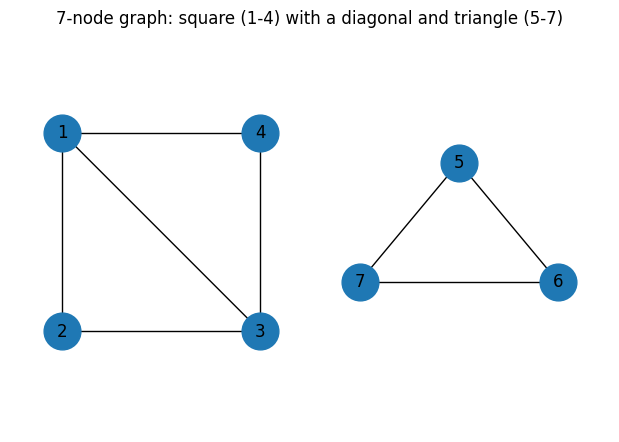

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# Square with a diagonal: nodes 1-4 (square) and diagonal (1,3)
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# Triangle: nodes 5-7
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from(triangle_edges)

# Positions: place square on the left, triangle on the right
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}

# Draw
plt.figure(figsize=(6,4))
nx.draw(G, pos=pos, with_labels=True, node_size=700, font_size=12)
plt.title("7-node graph: square (1-4) with a diagonal and triangle (5-7)")
plt.axis('equal')
plt.axis('off')
plt.show()


In [3]:
import networkx as nx
import numpy as np

# تعریف گراف بدون وزن (مثل برنامه اول)
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# مثلث
triangle_edges = [(5,6), (6,7)]
G.add_edges_from([(5,6), (6,7), (7,5)])

# ماتریس لاپلاسین (بدون وزن)
L = nx.laplacian_matrix(G).todense()
print("Laplacian Matrix L:")
print(L)

# مقادیر و بردارهای ویژه
eigvals, eigvecs = np.linalg.eigh(L)

print("\nEigenvalues:")
print(np.round(eigvals, 4))

print("\nEigenvectors (columns):")
print(np.round(eigvecs, 4))


Laplacian Matrix L:
[[ 3 -1 -1 -1  0  0  0]
 [-1  2 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0]
 [-1  0 -1  2  0  0  0]
 [ 0  0  0  0  2 -1 -1]
 [ 0  0  0  0 -1  2 -1]
 [ 0  0  0  0 -1 -1  2]]

Eigenvalues:
[0. 0. 2. 3. 3. 4. 4.]

Eigenvectors (columns):
[[-0.      0.5     0.      0.      0.      0.     -0.866 ]
 [-0.      0.5    -0.7071  0.      0.      0.4082  0.2887]
 [-0.      0.5     0.      0.      0.     -0.8165  0.2887]
 [-0.      0.5     0.7071  0.      0.      0.4082  0.2887]
 [ 0.5774  0.      0.      0.6395  0.5077  0.     -0.    ]
 [ 0.5774  0.      0.      0.1199 -0.8076  0.     -0.    ]
 [ 0.5774  0.      0.     -0.7594  0.3     0.     -0.    ]]


Eigenvalues: [0. 0. 2. 3. 3. 4. 4.]


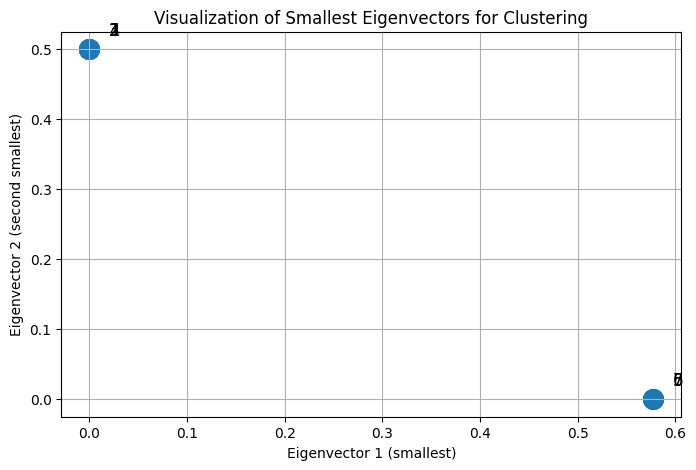

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# --- تعریف گراف ساده ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# مثلث
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from(triangle_edges)

# --- لاپلاسین ---
L = nx.laplacian_matrix(G).todense()
eigvals, eigvecs = np.linalg.eigh(L)

print("Eigenvalues:", np.round(eigvals,4))

# --- رسم eigenvectorهای کوچکترین مقادیر ویژه ---
# انتخاب دو بردار ویژه کوچک‌ترین مقادیر (صفر و نزدیک صفر)
X = eigvecs[:, :2]

plt.figure(figsize=(8,5))
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], s=200, color='C0')
    plt.text(X[i,0]+0.02, X[i,1]+0.02, str(i+1), fontsize=12)

plt.xlabel("Eigenvector 1 (smallest)")
plt.ylabel("Eigenvector 2 (second smallest)")
plt.title("Visualization of Smallest Eigenvectors for Clustering")
plt.grid(True)
plt.show()


Cluster labels for nodes:
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 1
Node 6: Cluster 1
Node 7: Cluster 1


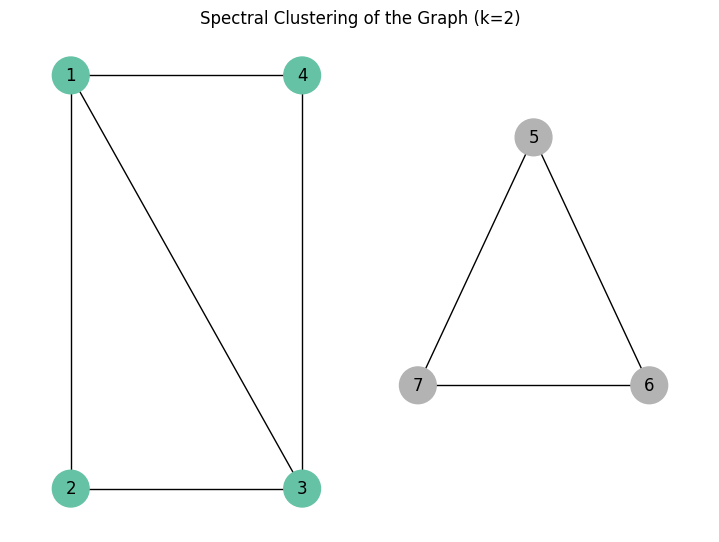

In [5]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- ساخت گراف ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from(square_edges)

# مثلث
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from(triangle_edges)

# --- محاسبه ماتریس لاپلاسین ---
L = nx.laplacian_matrix(G).todense()

# --- محاسبه مقادیر و بردارهای ویژه ---
eigvals, eigvecs = np.linalg.eigh(L)

# تعداد خوشه‌ها = 2 (چون گراف دو بخش جدا دارد: مربع+قطر و مثلث)
k = 2
X = eigvecs[:, :k]   # انتخاب k بردار ویژه متناظر با کوچکترین مقادیر ویژه

# --- اجرای KMeans روی فضای ویژگی ---
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
labels = kmeans.fit_predict(X)

# --- نمایش نتایج ---
print("Cluster labels for nodes:")
for node, cluster in zip(G.nodes(), labels):
    print(f"Node {node}: Cluster {cluster}")

# --- رسم گراف با رنگ خوشه‌ها ---
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=labels, cmap=plt.cm.Set2, font_size=12)
plt.title("Spectral Clustering of the Graph (k=2)")
plt.axis('off')
plt.show()


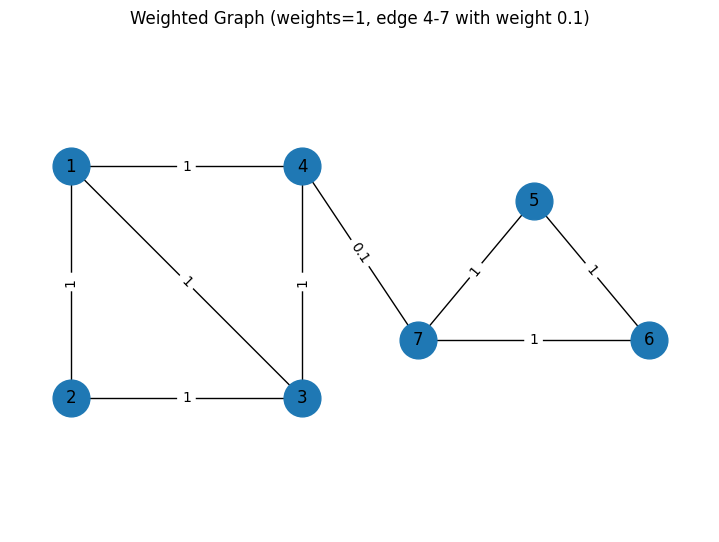

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create weighted graph
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# Square with diagonal (weight = 1)
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in square_edges)

# Triangle (weight = 1)
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in triangle_edges)

# Extra edge (weight = 0.1)
G.add_edge(4, 7, weight=0.1)

# Positions
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}

# Draw graph
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)

# Draw edge labels (weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

plt.title("Weighted Graph (weights=1, edge 4-7 with weight 0.1)")
plt.axis('equal')
plt.axis('off')
plt.show()


Laplacian matrix L (weighted):
[[ 3.  -1.  -1.  -1.   0.   0.   0. ]
 [-1.   2.  -1.   0.   0.   0.   0. ]
 [-1.  -1.   3.  -1.   0.   0.   0. ]
 [-1.   0.  -1.   2.1  0.   0.  -0.1]
 [ 0.   0.   0.   0.   2.  -1.  -1. ]
 [ 0.   0.   0.   0.  -1.   2.  -1. ]
 [ 0.   0.   0.  -0.1 -1.  -1.   2.1]]

Eigenvalues:
[0.       0.055309 2.047425 3.       3.069365 4.       4.027902]

Eigenvectors (columns):
[[-0.377964 -0.331721  0.016741 -0.        0.029657  0.707107 -0.495928]
 [-0.377964 -0.341155 -0.706014  0.       -0.055466  0.        0.489105]
 [-0.377964 -0.331721  0.016741 -0.        0.029657 -0.707107 -0.495928]
 [-0.377964 -0.303939  0.70522  -0.        0.023752  0.        0.516589]
 [-0.377964  0.444371 -0.034316  0.707107  0.397893 -0.        0.013462]
 [-0.377964  0.444371 -0.034316 -0.707107  0.397893  0.        0.013462]
 [-0.377964  0.419793  0.035944  0.       -0.823385 -0.       -0.04076 ]]

Cluster labels for nodes:
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 

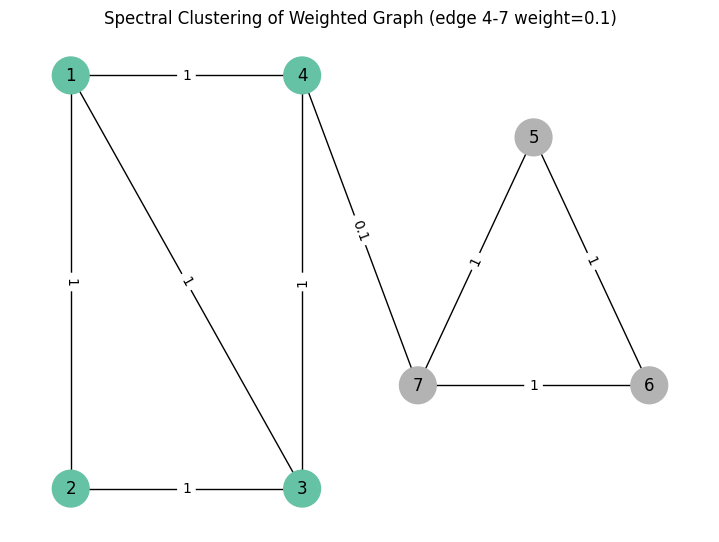

In [7]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- ساخت گراف وزن‌دار ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر (وزن 1)
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in square_edges)

# مثلث (وزن 1)
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in triangle_edges)

# یال اضافی بین 4 و 7 با وزن 0.1
G.add_edge(4, 7, weight=0.1)

# --- ماتریس لاپلاسین وزن‌دار ---
L = nx.laplacian_matrix(G, weight='weight').todense()
L = np.array(L, dtype=float)
print("Laplacian matrix L (weighted):")
print(np.round(L, 6))

# --- مقادیر و بردارهای ویژه ---
eigvals, eigvecs = np.linalg.eigh(L)
print("\nEigenvalues:")
print(np.round(eigvals, 6))

print("\nEigenvectors (columns):")
print(np.round(eigvecs, 6))

# --- خوشه‌بندی طیفی ---
k = 2  # انتظار داریم دو خوشه (مربع + مثلث، ولی چون یال ضعیف اضافه شده ارتباط کم ایجاد شده)
X = eigvecs[:, :k]
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
labels = kmeans.fit_predict(X)

print("\nCluster labels for nodes:")
for node, cluster in zip(G.nodes(), labels):
    print(f"Node {node}: Cluster {cluster}")

# --- نمایش گراف با رنگ‌بندی خوشه‌ها ---
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=labels, cmap=plt.cm.Set2, font_size=12)

# نمایش وزن‌ها روی یال‌ها
labels_edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edges)

plt.title("Spectral Clustering of Weighted Graph (edge 4-7 weight=0.1)")
plt.axis('off')
plt.show()


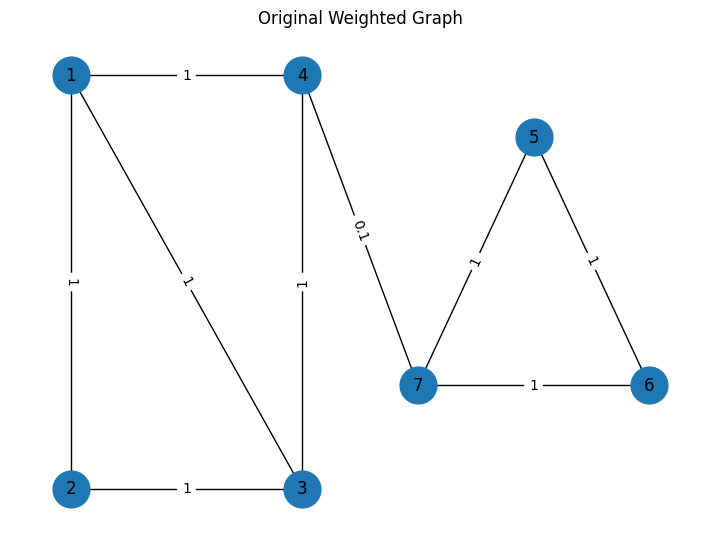

Eigenvalues (L_sym): [-0.        0.0249    0.998784  1.333333  1.483204  1.5       1.659778]

Cluster labels for nodes:
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 1
Node 6: Cluster 1
Node 7: Cluster 1


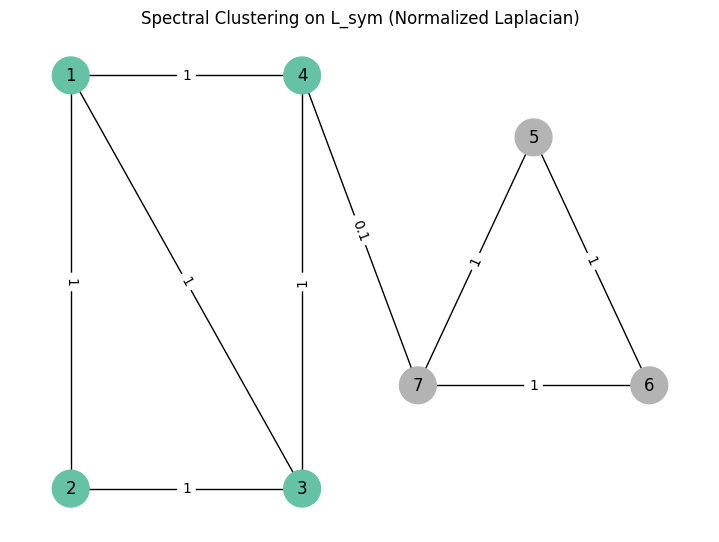

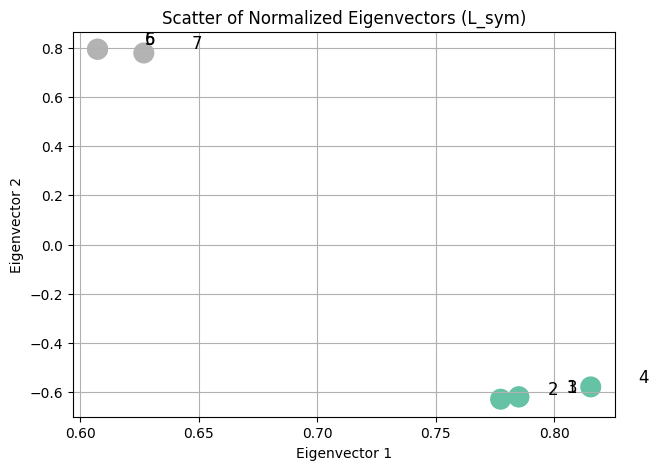

In [2]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

# --- ریست matplotlib ---
plt.close('all')

# --- ساخت گراف وزن‌دار ---
G = nx.Graph()
G.add_nodes_from(range(1, 8))

# مربع با قطر
square_edges = [(1,2), (2,3), (3,4), (4,1), (1,3)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in square_edges)

# مثلث
triangle_edges = [(5,6), (6,7), (7,5)]
G.add_edges_from((u, v, {'weight': 1}) for u, v in triangle_edges)

# یال اضافی بین 4 و 7 با وزن 0.1
G.add_edge(4, 7, weight=0.1)

# --- نمایش گراف اصلی ---
pos = {
    1: (-1,  1),
    2: (-1, -1),
    3: ( 1, -1),
    4: ( 1,  1),
    5: ( 3,  0.7),
    6: ( 4, -0.5),
    7: ( 2, -0.5),
}

plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=12)
labels_edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edges)
plt.title("Original Weighted Graph")
plt.axis('off')
plt.show()

# --- ماتریس لاپلاسین ---
A = nx.to_numpy_array(G, weight='weight')
D = np.diag(A.sum(axis=1))
L = D - A

# --- لاپلاسین نرمال‌شده (L_sym) ---
D_inv_sqrt = fractional_matrix_power(D, -0.5)
L_sym = D_inv_sqrt @ L @ D_inv_sqrt

# --- eigenvalues و eigenvectors ---
eigvals, eigvecs = np.linalg.eigh(L_sym)
print("Eigenvalues (L_sym):", np.round(eigvals,6))

# انتخاب k کوچکترین مقادیر eigenvectors (بدون صفر اول)
k = 2
X = eigvecs[:, :k]

# --- نرمال‌سازی سطرها ---
X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)

# --- KMeans ---
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
labels = kmeans.fit_predict(X_norm)

print("\nCluster labels for nodes:")
for node, cluster in zip(G.nodes(), labels):
    print(f"Node {node}: Cluster {cluster}")

# --- نمایش گراف با رنگ‌بندی خوشه‌ها ---
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=labels, cmap=plt.cm.Set2, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edges)
plt.title("Spectral Clustering on L_sym (Normalized Laplacian)")
plt.axis('off')
plt.show()

# --- scatter بردارهای ویژه با رنگ خوشه‌ها ---
plt.figure(figsize=(7,5))
plt.scatter(X_norm[:,0], X_norm[:,1], s=200, c=labels, cmap=plt.cm.Set2)
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i,0]+0.02, X_norm[i,1]+0.02, str(i+1), fontsize=12)
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.title("Scatter of Normalized Eigenvectors (L_sym)")
plt.grid(True)
plt.show()


In [3]:
# -----------------------------
# نمایش بردارهای ویژه مهم به صورت ستونی
# -----------------------------
print("\nEigenvectors corresponding to the two smallest eigenvalues (columns = eigenvectors, rows = nodes):\n")
print(np.round(X, 4))  # ماتریس ستونی

# توضیح:
# سطرها = گره‌ها (Node 1 تا Node 7)
# ستون‌ها = بردارهای ویژه مربوط به کوچکترین مقادیر ویژه (Eigenvector 1 و 2)



Eigenvectors corresponding to the two smallest eigenvalues (columns = eigenvectors, rows = nodes):

[[ 0.4303 -0.3396]
 [ 0.3514 -0.2844]
 [ 0.4303 -0.3396]
 [ 0.36   -0.2557]
 [ 0.3514  0.4597]
 [ 0.3514  0.4597]
 [ 0.36    0.4476]]


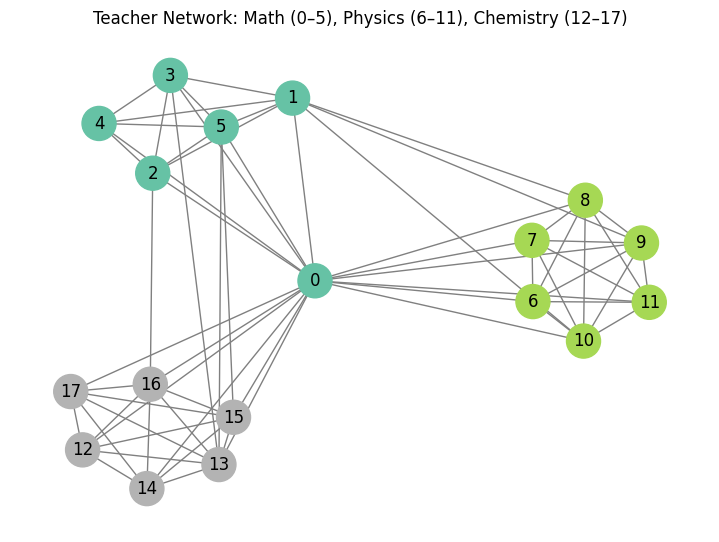

Smallest eigenvalues of L:
[0.     0.928  1.0665 6.0132 6.0472 6.0806]


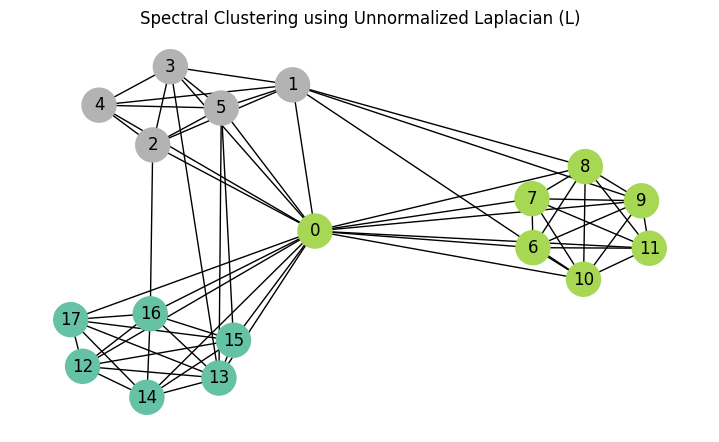


Smallest eigenvalues of Lrw:
[-0.2176  0.1567  0.1956  1.1638  1.1651  1.1668]


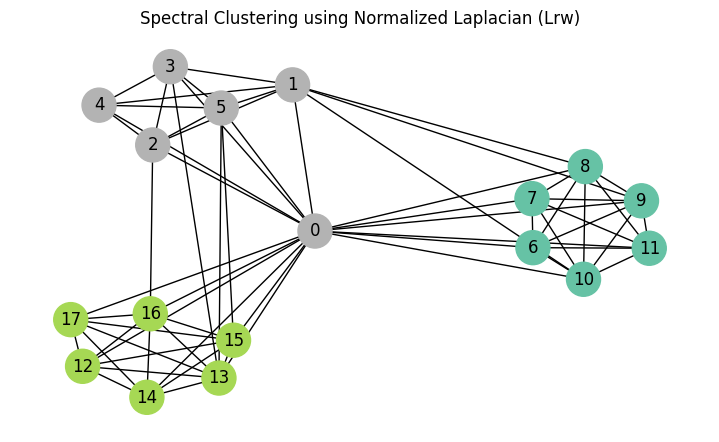

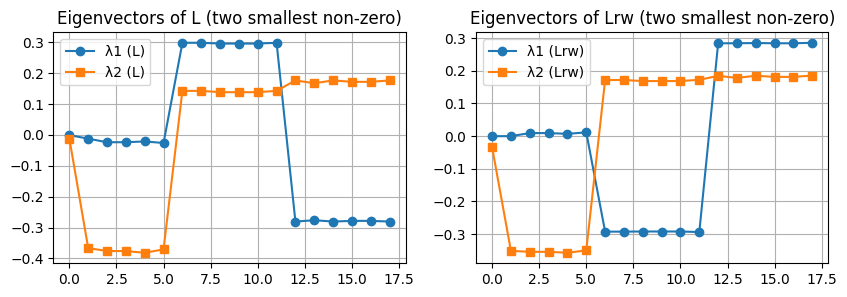

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- Parameters ---
np.random.seed(0)
n_math, n_phys, n_chem = 6, 6, 6  # teachers of each subject
w_in = 1.0    # strong links inside clusters
w_out = 0.05  # weak links between clusters

# --- Build the graph ---
G = nx.Graph()

# node indices
math_nodes = list(range(0, n_math))
phys_nodes = list(range(n_math, n_math+n_phys))
chem_nodes = list(range(n_math+n_phys, n_math+n_phys+n_chem))

# fully connect nodes inside each cluster
for cluster in [math_nodes, phys_nodes, chem_nodes]:
    for i in cluster:
        for j in cluster:
            if i < j:
                G.add_edge(i, j, weight=w_in)

# add weak inter-cluster edges randomly
for i in math_nodes:
    for j in phys_nodes + chem_nodes:
        if np.random.rand() < 0.1:
            G.add_edge(i, j, weight=w_out)

# --- add one "high-degree" math teacher ---
for j in phys_nodes + chem_nodes:
    G.add_edge(0, j, weight=0.9)

# ground truth
true_labels = (
    [0]*len(math_nodes) +
    [1]*len(phys_nodes) +
    [2]*len(chem_nodes)
)

# --- Draw the graph ---
plt.figure(figsize=(7,5))
pos = nx.spring_layout(G, seed=2)
nx.draw(G, pos, node_color=true_labels, with_labels=True,
        cmap=plt.cm.Set2, node_size=600, edge_color='gray')
plt.title("Teacher Network: Math (0–5), Physics (6–11), Chemistry (12–17)")
plt.axis('off')
plt.show()

# --- Compute matrices ---
A = nx.to_numpy_array(G, weight='weight')
D = np.diag(A.sum(axis=1))
L = D - A

# --- eigenvalues & eigenvectors (L) ---
eigvals, eigvecs = np.linalg.eigh(L)

print("Smallest eigenvalues of L:")
print(np.round(eigvals[:6], 4))

# --- spectral clustering using L ---
k = 3
X = eigvecs[:, 1:k]
labels_L = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(X)

plt.figure(figsize=(7,4))
nx.draw(G, pos, node_color=labels_L, with_labels=True, cmap=plt.cm.Set2, node_size=600)
plt.title("Spectral Clustering using Unnormalized Laplacian (L)")
plt.axis('off')
plt.show()

# --- Normalized Laplacian: Lrw = I - D^{-1}A ---
D_inv = np.linalg.inv(D)
Lrw = np.eye(len(A)) - D_inv @ A

eigvals_rw, eigvecs_rw = np.linalg.eigh(Lrw)
print("\nSmallest eigenvalues of Lrw:")
print(np.round(eigvals_rw[:6], 4))

# --- spectral clustering using Lrw ---
Xrw = eigvecs_rw[:, 1:k]
labels_rw = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(Xrw)

plt.figure(figsize=(7,4))
nx.draw(G, pos, node_color=labels_rw, with_labels=True, cmap=plt.cm.Set2, node_size=600)
plt.title("Spectral Clustering using Normalized Laplacian (Lrw)")
plt.axis('off')
plt.show()

# --- show eigenvectors of smallest eigenvalues ---
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(eigvecs[:,1], 'o-', label='λ1 (L)')
plt.plot(eigvecs[:,2], 's-', label='λ2 (L)')
plt.title("Eigenvectors of L (two smallest non-zero)")
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(eigvecs_rw[:,1], 'o-', label='λ1 (Lrw)')
plt.plot(eigvecs_rw[:,2], 's-', label='λ2 (Lrw)')
plt.title("Eigenvectors of Lrw (two smallest non-zero)")
plt.legend(); plt.grid(True)
plt.show()


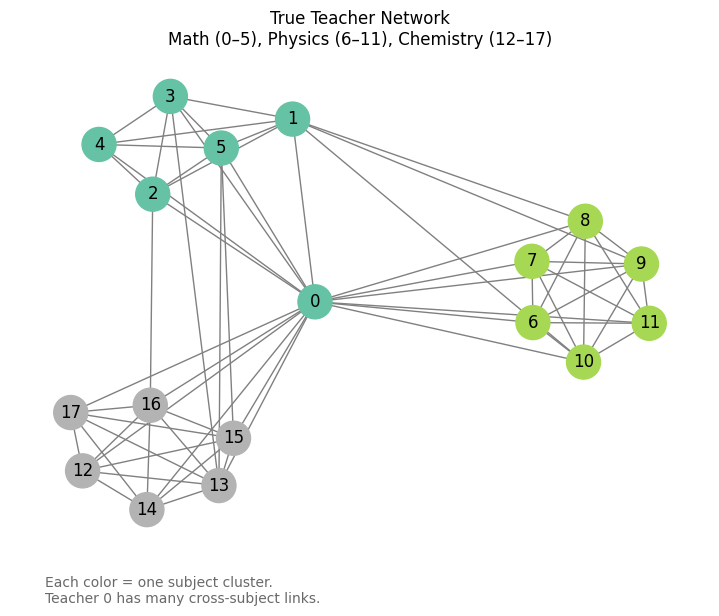


Method: Unnormalized L
  Smallest eigenvalues: [0.     0.928  1.0665 6.0132 6.0472 6.0806]
  Clustering accuracy: 94.44%

Method: Normalized Lrw
  Smallest eigenvalues: [-0.2176  0.1567  0.1956  1.1638  1.1651  1.1668]
  Clustering accuracy: 100.00%

Method: Normalized Lsym
  Smallest eigenvalues: [-0.      0.1566  0.2009  1.163   1.1642  1.1661]
  Clustering accuracy: 100.00%


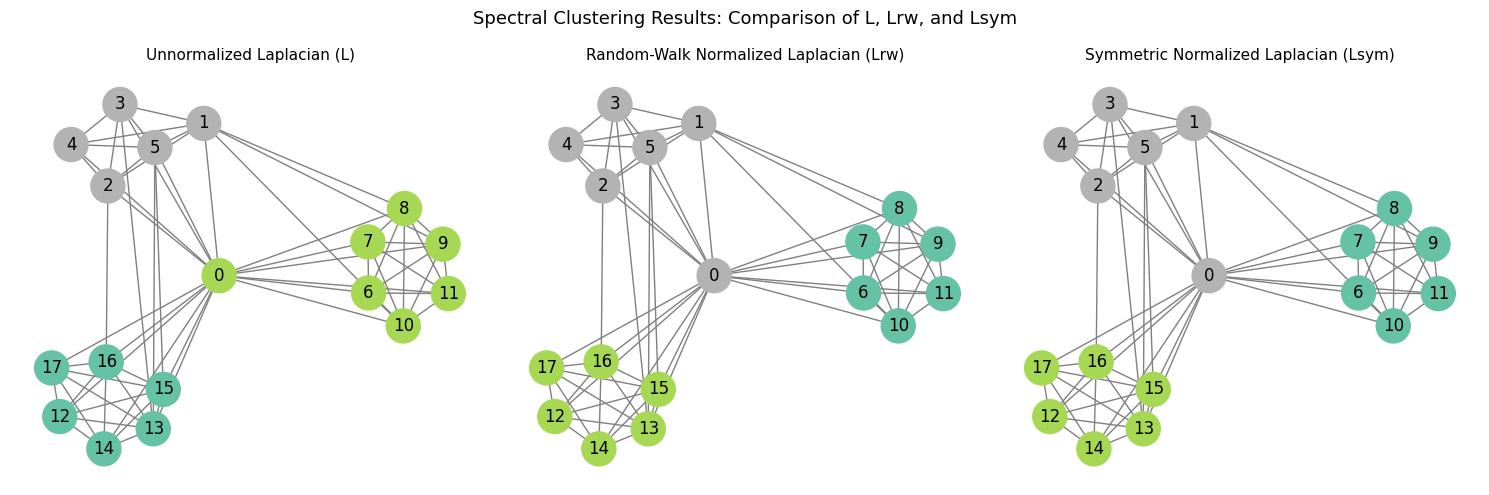

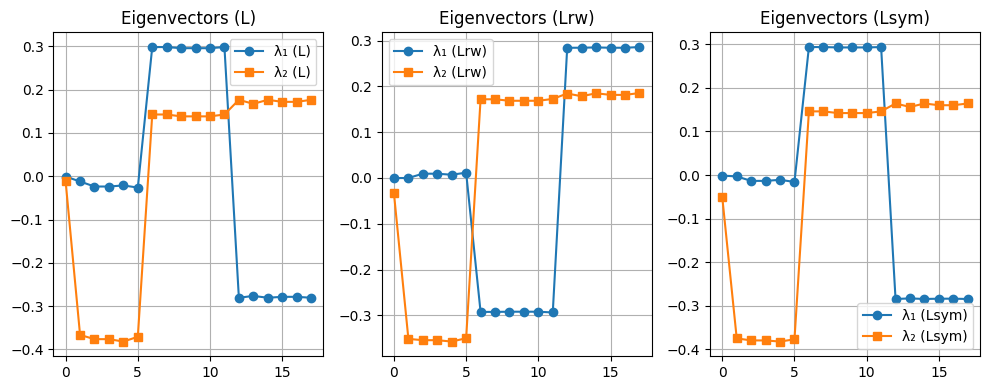

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment  # for optimal label matching

# -----------------------------
# Helper function: clustering accuracy (with label permutation correction)
# -----------------------------
def clustering_accuracy(true_labels, pred_labels):
    n_clusters = len(set(true_labels))
    cost_matrix = np.zeros((n_clusters, n_clusters), dtype=int)
    for i in range(n_clusters):
        for j in range(n_clusters):
            cost_matrix[i, j] = np.sum((np.array(true_labels) == i) & (np.array(pred_labels) == j))
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    return cost_matrix[row_ind, col_ind].sum() / len(true_labels)

# -----------------------------
# 1. Build graph (teacher network)
# -----------------------------
np.random.seed(0)
n_math, n_phys, n_chem = 6, 6, 6
w_in, w_out = 1.0, 0.05

G = nx.Graph()

math_nodes = list(range(0, n_math))
phys_nodes = list(range(n_math, n_math+n_phys))
chem_nodes = list(range(n_math+n_phys, n_math+n_phys+n_chem))

for cluster in [math_nodes, phys_nodes, chem_nodes]:
    for i in cluster:
        for j in cluster:
            if i < j:
                G.add_edge(i, j, weight=w_in)

# weak inter-cluster edges
for i in math_nodes:
    for j in phys_nodes + chem_nodes:
        if np.random.rand() < 0.1:
            G.add_edge(i, j, weight=w_out)

# one high-degree math teacher connected strongly to all others
for j in phys_nodes + chem_nodes:
    G.add_edge(0, j, weight=0.9)

true_labels = [0]*len(math_nodes) + [1]*len(phys_nodes) + [2]*len(chem_nodes)
pos = nx.spring_layout(G, seed=2)

# -----------------------------
# 2. Show true structure
# -----------------------------
plt.figure(figsize=(7,5))
nx.draw(G, pos, node_color=true_labels, with_labels=True, cmap=plt.cm.Set2,
        node_size=600, edge_color='gray')
plt.title("True Teacher Network\nMath (0–5), Physics (6–11), Chemistry (12–17)", fontsize=12)
plt.text(0.05, -0.1,
         "Each color = one subject cluster.\nTeacher 0 has many cross-subject links.",
         transform=plt.gca().transAxes, fontsize=10, color="dimgray")
plt.axis('off')
plt.show()

# -----------------------------
# 3. Compute Laplacians
# -----------------------------
A = nx.to_numpy_array(G, weight='weight')
D = np.diag(A.sum(axis=1))
L = D - A
D_inv = np.linalg.inv(D)
D_inv_sqrt = np.linalg.inv(np.sqrt(D))

Lrw = np.eye(len(A)) - D_inv @ A
Lsym = np.eye(len(A)) - D_inv_sqrt @ A @ D_inv_sqrt

# -----------------------------
# 4. Eigen decomposition
# -----------------------------
def spectral_cluster(L_matrix, true_labels, k, method_name):
    eigvals, eigvecs = np.linalg.eigh(L_matrix)
    X = eigvecs[:, 1:k]
    labels = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(X)
    acc = clustering_accuracy(true_labels, labels)
    print(f"\nMethod: {method_name}")
    print("  Smallest eigenvalues:", np.round(eigvals[:6], 4))
    print(f"  Clustering accuracy: {acc*100:.2f}%")
    return labels, eigvecs

k = 3
labels_L, eigvecs_L = spectral_cluster(L, true_labels, k, "Unnormalized L")
labels_Lrw, eigvecs_Lrw = spectral_cluster(Lrw, true_labels, k, "Normalized Lrw")
labels_Lsym, eigvecs_Lsym = spectral_cluster(Lsym, true_labels, k, "Normalized Lsym")

# -----------------------------
# 5. Visualization of clustering results
# -----------------------------
plt.figure(figsize=(15,5))
for i, (labels, title) in enumerate(zip(
    [labels_L, labels_Lrw, labels_Lsym],
    ["Unnormalized Laplacian (L)",
     "Random-Walk Normalized Laplacian (Lrw)",
     "Symmetric Normalized Laplacian (Lsym)"]
)):
    plt.subplot(1,3,i+1)
    nx.draw(G, pos, node_color=labels, with_labels=True, cmap=plt.cm.Set2,
            node_size=600, edge_color='gray')
    plt.title(title, fontsize=11)
    plt.axis('off')

plt.suptitle("Spectral Clustering Results: Comparison of L, Lrw, and Lsym", fontsize=13)
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Eigenvector comparison
# -----------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(eigvecs_L[:,1], 'o-', label='λ₁ (L)')
plt.plot(eigvecs_L[:,2], 's-', label='λ₂ (L)')
plt.title("Eigenvectors (L)")
plt.legend(); plt.grid(True)

plt.subplot(1,3,2)
plt.plot(eigvecs_Lrw[:,1], 'o-', label='λ₁ (Lrw)')
plt.plot(eigvecs_Lrw[:,2], 's-', label='λ₂ (Lrw)')
plt.title("Eigenvectors (Lrw)")
plt.legend(); plt.grid(True)

plt.subplot(1,3,3)
plt.plot(eigvecs_Lsym[:,1], 'o-', label='λ₁ (Lsym)')
plt.plot(eigvecs_Lsym[:,2], 's-', label='λ₂ (Lsym)')
plt.title("Eigenvectors (Lsym)")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()



Method: Unnormalized L
All eigenvalues:
[ 0.      0.928   1.0665  6.0132  6.0472  6.0806  6.1299  6.9     6.9
  6.9     6.9     6.9284  6.9303  6.95    6.95    6.9528  6.9913 16.7318]
Smallest 3 eigenvalues:
[0.     0.928  1.0665]


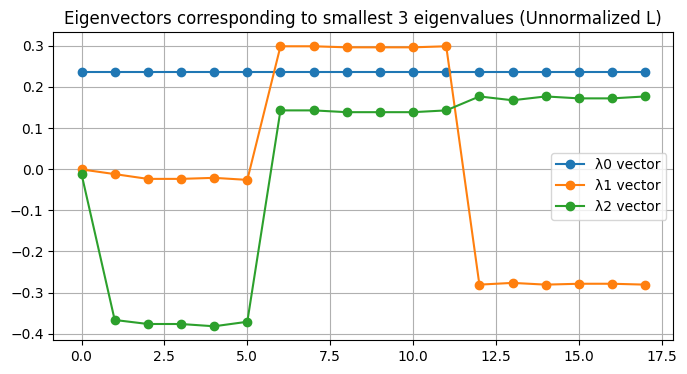


Method: Normalized Lrw
All eigenvalues:
[-0.2176  0.1567  0.1956  1.1638  1.1651  1.1668  1.1668  1.1681  1.1681
  1.1695  1.1699  1.17    1.1705  1.1962  1.2005  1.2006  1.2019  1.3876]
Smallest 3 eigenvalues:
[-0.2176  0.1567  0.1956]


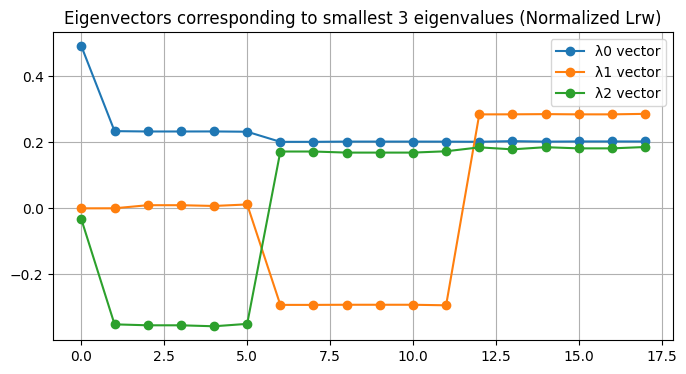


Method: Normalized Lsym
All eigenvalues:
[-0.      0.1566  0.2009  1.163   1.1642  1.1661  1.1669  1.1681  1.1681
  1.1695  1.1695  1.1695  1.1695  1.1699  1.1981  1.1988  1.2     1.2015]
Smallest 3 eigenvalues:
[-0.      0.1566  0.2009]


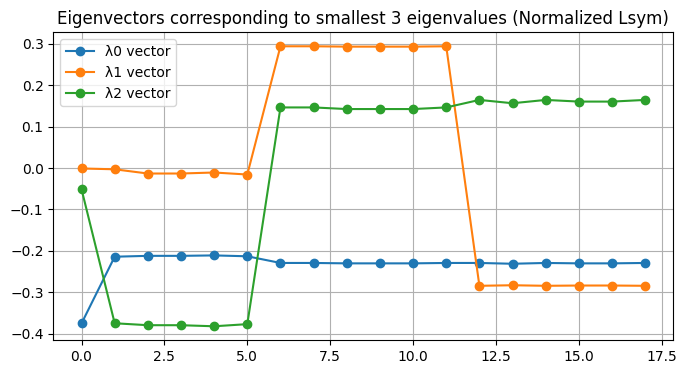

In [11]:
# -----------------------------
# 4b. Eigen decomposition: show top 3 smallest eigenvalues and all eigenvalues
# -----------------------------
def show_eigen_info(L_matrix, method_name, k=3):
    eigvals, eigvecs = np.linalg.eigh(L_matrix)

    print(f"\nMethod: {method_name}")
    print("All eigenvalues:")
    print(np.round(eigvals, 4))
    print(f"Smallest {k} eigenvalues:")
    print(np.round(eigvals[:k], 4))

    # نمایش بردارهای ویژه سه مقدار کوچک
    plt.figure(figsize=(8,4))
    for i in range(k):
        plt.plot(eigvecs[:, i], 'o-', label=f'λ{i} vector')
    plt.title(f'Eigenvectors corresponding to smallest {k} eigenvalues ({method_name})')
    plt.legend(); plt.grid(True)
    plt.show()

    return eigvals, eigvecs

eigvals_L, eigvecs_L = show_eigen_info(L, "Unnormalized L", k=3)
eigvals_Lrw, eigvecs_Lrw = show_eigen_info(Lrw, "Normalized Lrw", k=3)
eigvals_Lsym, eigvecs_Lsym = show_eigen_info(Lsym, "Normalized Lsym", k=3)


In [13]:
# -----------------------------
# Show 3 eigenvectors corresponding to the 3 smallest eigenvalues (column-wise)
# -----------------------------
def smallest_three_eigenvectors_column(L_matrix, method_name):
    eigvals, eigvecs = np.linalg.eigh(L_matrix)
    vectors = eigvecs[:, :3]  # سه بردار ویژه کوچک‌ترین مقادیر ویژه
    print(f"\nMethod: {method_name}")
    print("Smallest 3 eigenvalues:", np.round(eigvals[:3], 4))
    print("Eigenvectors (columns = eigenvectors, rows = nodes):\n")
    print(np.round(vectors, 4))  # چاپ به صورت ماتریسی، ستونی
    return vectors

# اعمال برای سه ماتریس
eigvecs_small_L = smallest_three_eigenvectors_column(L, "Unnormalized L")
eigvecs_small_Lsym = smallest_three_eigenvectors_column(Lsym, "Normalized Lsym")
eigvecs_small_Lrw = smallest_three_eigenvectors_column(Lrw, "Normalized Lrw")



Method: Unnormalized L
Smallest 3 eigenvalues: [0.     0.928  1.0665]
Eigenvectors (columns = eigenvectors, rows = nodes):

[[ 0.2357 -0.0007 -0.012 ]
 [ 0.2357 -0.0121 -0.3665]
 [ 0.2357 -0.0237 -0.3763]
 [ 0.2357 -0.0237 -0.3763]
 [ 0.2357 -0.0212 -0.3818]
 [ 0.2357 -0.0262 -0.3709]
 [ 0.2357  0.2984  0.1427]
 [ 0.2357  0.2984  0.1427]
 [ 0.2357  0.2959  0.1383]
 [ 0.2357  0.2959  0.1383]
 [ 0.2357  0.2959  0.1383]
 [ 0.2357  0.2984  0.1427]
 [ 0.2357 -0.2806  0.1765]
 [ 0.2357 -0.2764  0.1673]
 [ 0.2357 -0.2806  0.1765]
 [ 0.2357 -0.2785  0.1719]
 [ 0.2357 -0.2785  0.1718]
 [ 0.2357 -0.2806  0.1765]]

Method: Normalized Lsym
Smallest 3 eigenvalues: [-0.      0.1566  0.2009]
Eigenvectors (columns = eigenvectors, rows = nodes):

[[-0.3751 -0.0013 -0.0512]
 [-0.2141 -0.0032 -0.3747]
 [-0.2121 -0.0134 -0.3794]
 [-0.2121 -0.0134 -0.3794]
 [-0.211  -0.011  -0.382 ]
 [-0.2131 -0.0158 -0.3768]
 [-0.2292  0.2936  0.146 ]
 [-0.2292  0.2936  0.146 ]
 [-0.2302  0.2927  0.1421]
 [-0.2302  0.292